In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,7)
import seaborn as sns;sns.set()
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error,mean_squared_error,root_mean_squared_error


In [2]:
df=pd.read_csv(r"C:/Users/Omar/Desktop/Omar_Files/Python_Analysis/Auto_Insurance/Data_Sets/new_cleaned_df.csv")
df.head()

,veh_value,exposure,clm,numclaims,claimcst0,veh_body,veh_age,gender,area,agecat,severity,frequincy,pure_premium
0,1060.0,0.30,0,0,0.0,HBACK,3,F,C,2,0.0,0.0,0.0
1,1030.0,0.65,0,0,0.0,HBACK,2,F,A,4,0.0,0.0,0.0
2,3260.0,0.57,0,0,0.0,UTE,2,F,E,2,0.0,0.0,0.0
3,4140.0,0.32,0,0,0.0,STNWG,2,F,D,2,0.0,0.0,0.0
4,720.0,0.65,0,0,0.0,HBACK,4,F,C,2,0.0,0.0,0.0


## *numclaims*

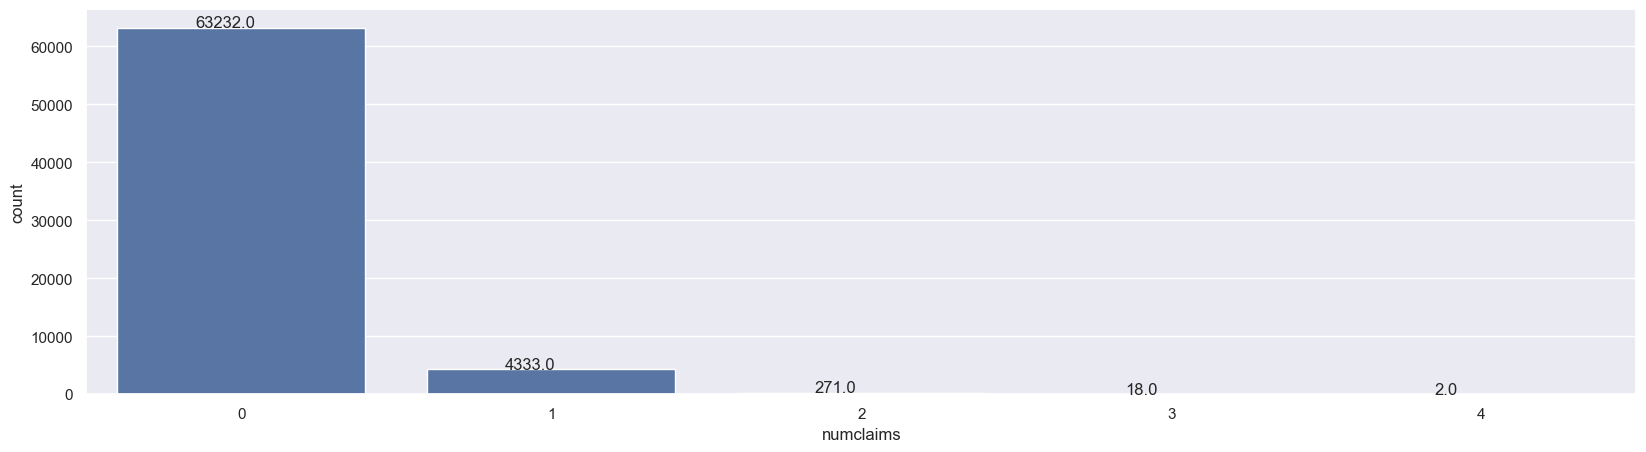

In [3]:
matplotlib.rcParams["figure.figsize"]=(20,5)
ax=sns.countplot(data=df,x="numclaims")
for p in ax.patches:
         ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))  

In [4]:
df.drop(["clm"],axis=1,inplace=True)

In [5]:
LabelEncoder_cat = LabelEncoder()
for col in df:
    if col in ["veh_body","veh_age","gender","area","agecat"]:
        df[col]=LabelEncoder_cat.fit_transform(df[col])

In [6]:
import statsmodels.api as sm

X = df.drop("numclaims",axis=1)
y = df['numclaims']
X = sm.add_constant(X)

In [7]:
glm_model = sm.GLM(y, X, family=sm.families.Poisson()).fit()
print(glm_model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              numclaims   No. Observations:                67856
Model:                            GLM   Df Residuals:                    67844
Model Family:                 Poisson   Df Model:                           11
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15754.
Date:                Thu, 27 Jun 2024   Deviance:                       22074.
Time:                        23:41:10   Pearson chi2:                 5.39e+04
No. Iterations:                    31   Pseudo R-squ. (CS):            0.06685
Covariance Type:            nonrobust                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -3.6387      0.065    -55.740   

In [51]:
result=pd.concat([pd.DataFrame(glm_model.params,columns=["coef"]),
          pd.DataFrame(glm_model.pvalues,columns=["p_value"]),
          ],axis=1).reset_index().rename(columns={"index":"feature"})

In [52]:
result

,feature,coef,p_value
0,const,-3.638717,0.000000e+00
1,veh_value,0.000005,7.326659e-01
2,exposure,1.978540,0.000000e+00
3,claimcst0,0.000374,1.310466e-229
4,veh_body,0.003701,4.598690e-01
5,veh_age,-0.029568,7.784789e-02
6,gender,-0.068664,2.220615e-02
7,area,-0.001740,8.614201e-01
8,agecat,-0.060201,3.367544e-09
9,severity,-0.000219,1.073257e-71


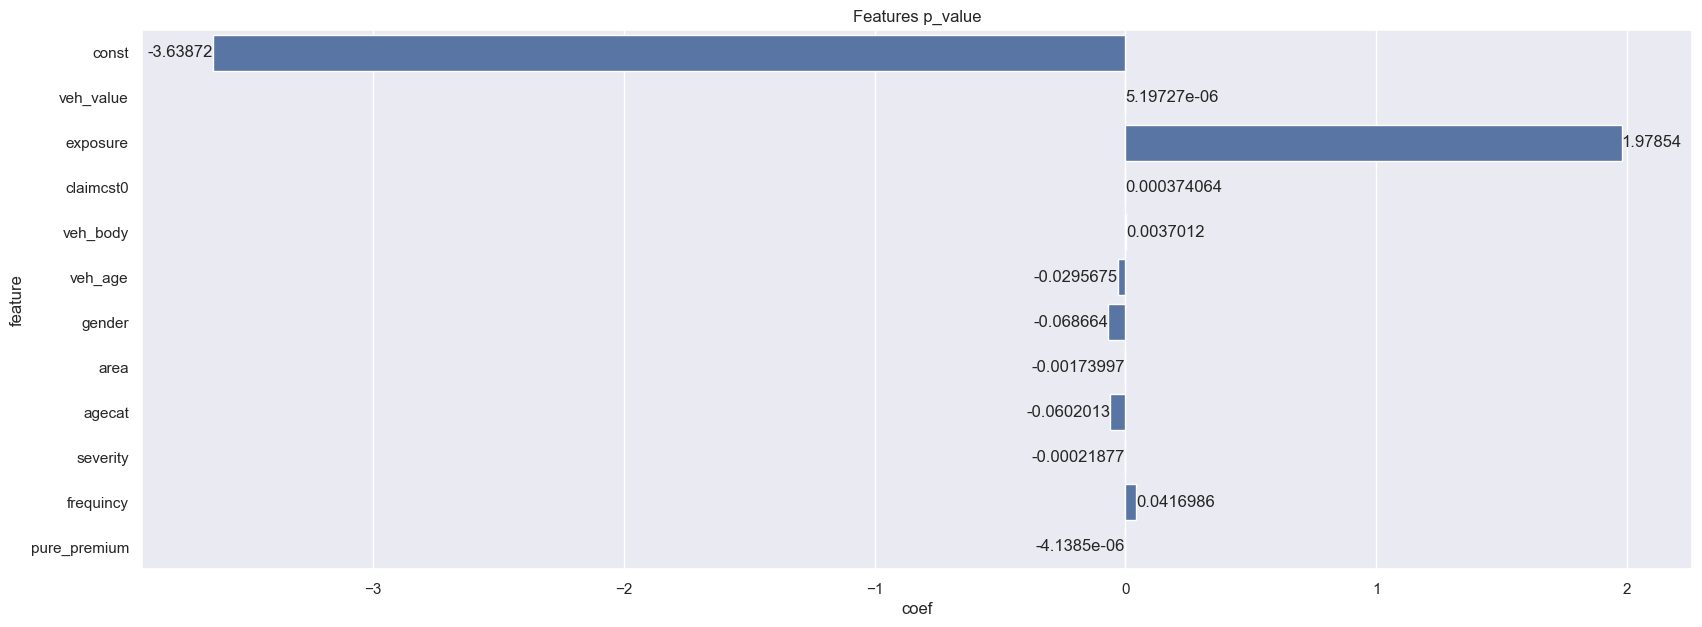

In [74]:
matplotlib.rcParams["figure.figsize"]=(20,7)
ax=sns.barplot(y="feature",x="coef",data=result)
plt.title('Features p_value')
ax.bar_label(ax.containers[0]);

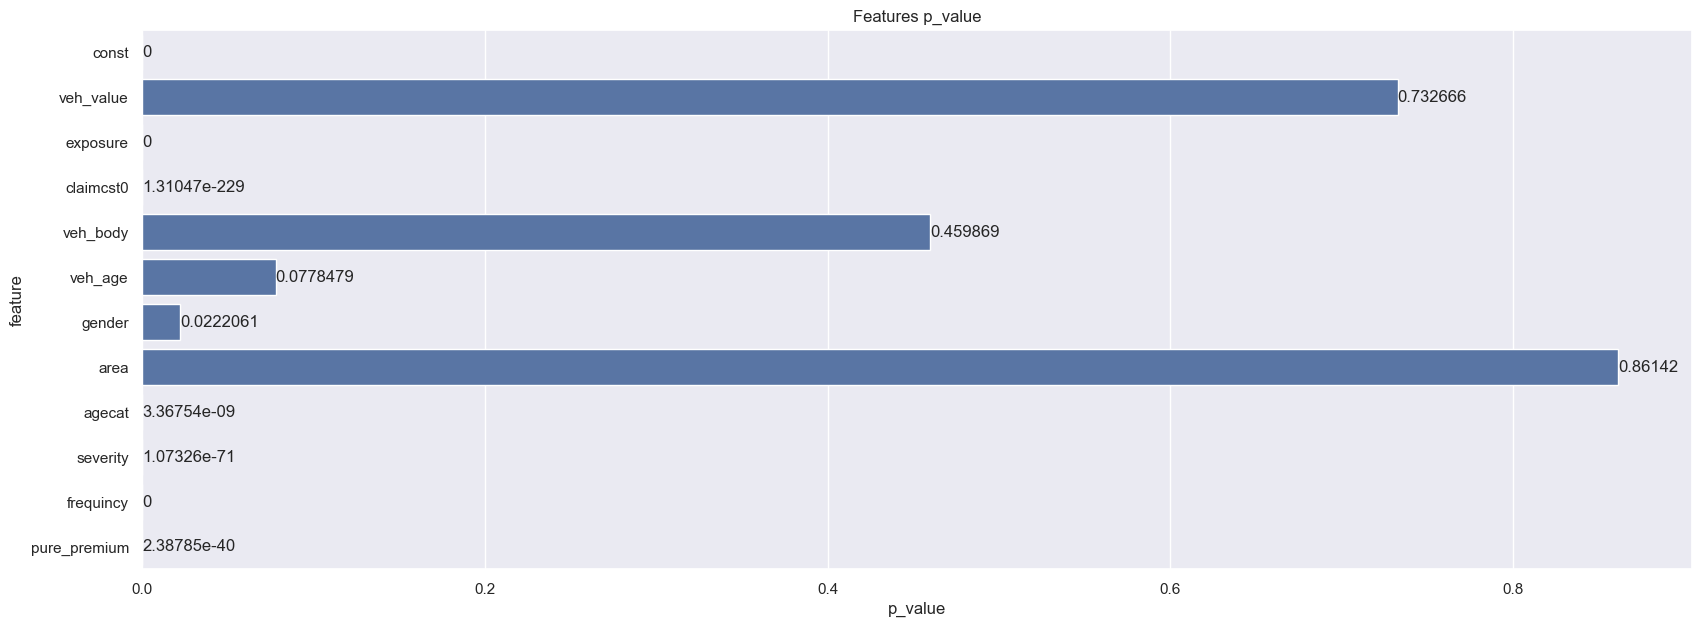

In [73]:
matplotlib.rcParams["figure.figsize"]=(20,7)
ax=sns.barplot(y="feature",x="p_value",data=result)
plt.title('Features p_value')
ax.bar_label(ax.containers[0]);